# Download Data


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import shap

# Prepare data for model

In [ ]:
data = pd.read_csv('all_years_game.csv')
data

,game_date,game_pk,batter,hits_count_x,cumulative_game_hit,games_played,hpg/year,h_last_10_games,ks_count_x,cumulative_ks,...,w_last_3_games,ab_last_5_games,ab_last_3_games,life_games_played,life_game_hit,life_walks,life_ks,life_kpg,life_wpg,life_hpg
0,2015-04-06,413649,405395,0,0,1,0.000000,0.0,1,1,...,0.0,0.0,0.0,1,0,2,1,0.000000,0.000000,0.000000
1,2015-04-06,413649,429664,1,1,1,0.000000,0.0,1,1,...,0.0,0.0,0.0,1,1,0,1,0.000000,0.000000,0.000000
2,2015-04-06,413649,430947,1,1,1,0.000000,0.0,1,1,...,0.0,0.0,0.0,1,1,0,1,0.000000,0.000000,0.000000
3,2015-04-06,413649,443558,0,0,1,0.000000,0.0,0,0,...,0.0,0.0,0.0,1,0,0,0,0.000000,0.000000,0.000000
4,2015-04-06,413649,448605,0,0,1,0.000000,0.0,0,0,...,0.0,0.0,0.0,1,0,1,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434168,2023-10-03,748585,666397,0,62,113,0.553571,5.0,1,135,...,3.0,15.0,11.0,113,62,71,135,1.196429,0.625000,0.553571
434169,2023-10-03,748585,668904,2,46,64,0.714286,7.0,0,63,...,1.0,19.0,12.0,77,56,27,69,0.907895,0.342105,0.723684
434170,2023-10-03,748585,670242,0,34,76,0.453333,1.0,1,84,...,3.0,9.0,6.0,94,43,51,109,1.161290,0.537634,0.462366
434171,2023-10-03,748585,672386,0,65,123,0.532787,6.0,0,46,...,1.0,20.0,12.0,331,190,138,131,0.396970,0.412121,0.575758


In [ ]:
data = data.drop('game_date', axis=1)
data = data.drop('hits_count_x', axis=1)
data = data.drop('game_pk', axis=1)
data = data.drop('batter', axis=1)
data = data.drop('cumulative_game_hit', axis=1)
data = data.drop('ks_count_x', axis=1)
data = data.drop('walks_count_x', axis=1)
data = data.drop('ab_count_x', axis=1)


In [ ]:
data

,games_played,hpg/year,h_last_10_games,cumulative_ks,k_last_10_games,cumulative_ws,w_last_10_games,cumulative_abs,ab_last_10_games,kpg/year,...,w_last_3_games,ab_last_5_games,ab_last_3_games,life_games_played,life_game_hit,life_walks,life_ks,life_kpg,life_wpg,life_hpg
0,1,0.000000,0.0,1,0.0,2,0.0,2,0.0,0.000000,...,0.0,0.0,0.0,1,0,2,1,0.000000,0.000000,0.000000
1,1,0.000000,0.0,1,0.0,0,0.0,4,0.0,0.000000,...,0.0,0.0,0.0,1,1,0,1,0.000000,0.000000,0.000000
2,1,0.000000,0.0,1,0.0,0,0.0,3,0.0,0.000000,...,0.0,0.0,0.0,1,1,0,1,0.000000,0.000000,0.000000
3,1,0.000000,0.0,0,0.0,0,0.0,4,0.0,0.000000,...,0.0,0.0,0.0,1,0,0,0,0.000000,0.000000,0.000000
4,1,0.000000,0.0,0,0.0,1,0.0,0,0.0,0.000000,...,0.0,0.0,0.0,1,0,1,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434168,113,0.553571,5.0,135,12.0,71,5.0,358,32.0,1.196429,...,3.0,15.0,11.0,113,62,71,135,1.196429,0.625000,0.553571
434169,64,0.714286,7.0,63,13.0,26,3.0,239,40.0,1.000000,...,1.0,19.0,12.0,77,56,27,69,0.907895,0.342105,0.723684
434170,76,0.453333,1.0,84,8.0,44,7.0,221,19.0,1.106667,...,3.0,9.0,6.0,94,43,51,109,1.161290,0.537634,0.462366
434171,123,0.532787,6.0,46,6.0,49,4.0,380,32.0,0.377049,...,1.0,20.0,12.0,331,190,138,131,0.396970,0.412121,0.575758


In [ ]:
corr_matrix = data.corr()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



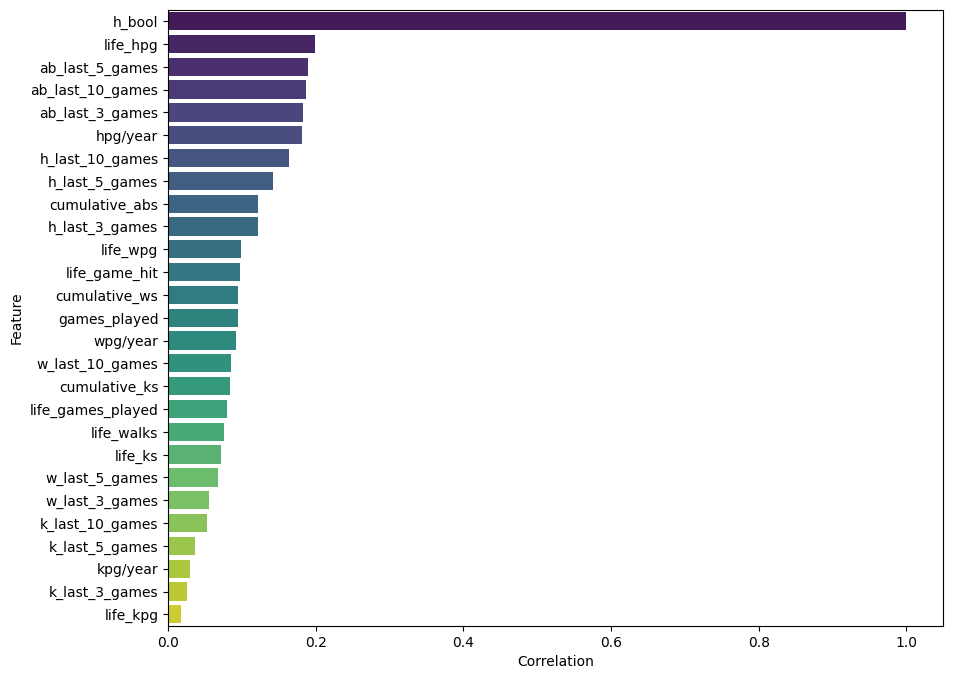

In [ ]:
y_corr = corr_matrix['h_bool']
corr_df = pd.DataFrame({'Feature': y_corr.index, 'Correlation': y_corr.values})
corr_df = corr_df.sort_values(by='Correlation', ascending=False)
plt.figure(figsize=(10,8))

sns.barplot(x='Correlation', y='Feature', data=corr_df, palette='viridis')
plt.show()

In [ ]:
X = data.drop('h_bool', axis=1)
y = data['h_bool']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.005, shuffle=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(90, activation='tanh'),
    tf.keras.layers.Dense(80, activation='tanh'),
    tf.keras.layers.Dense(70, activation='tanh'),
    tf.keras.layers.Dense(60, activation='tanh'),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
10855/10855 [==============================] - 50s 4ms/step - loss: 0.6638 - accuracy: 0.6081 - val_loss: 0.6633 - val_accuracy: 0.6069
Epoch 2/50
10855/10855 [==============================] - 41s 4ms/step - loss: 0.6619 - accuracy: 0.6097 - val_loss: 0.6619 - val_accuracy: 0.6096
Epoch 3/50
10855/10855 [==============================] - 40s 4ms/step - loss: 0.6616 - accuracy: 0.6088 - val_loss: 0.6601 - val_accuracy: 0.6098
Epoch 4/50
10855/10855 [==============================] - 37s 3ms/step - loss: 0.6608 - accuracy: 0.6104 - val_loss: 0.6597 - val_accuracy: 0.6109
Epoch 5/50
10855/10855 [==============================] - 38s 4ms/step - loss: 0.6606 - accuracy: 0.6101 - val_loss: 0.6606 - val_accuracy: 0.6109
Epoch 6/50
10855/10855 [==============================] - 42s 4ms/step - loss: 0.6607 - accuracy: 0.6107 - val_loss: 0.6628 - val_accuracy: 0.6121
Epoch 7/50
10855/10855 [==============================] - 37s 3ms/step - loss: 0.6611 - accuracy: 0.6110 - val_loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

14/14 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6207
Test Accuracy: 0.6206896305084229


In [ ]:
predictions = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
results = pd.DataFrame({'Probability': predictions.flatten()})
results_sorted = results.sort_values(by='Probability', ascending=False)
results_sorted

,Probability
127,0.909592
248,0.908804
316,0.908792
346,0.908789
359,0.908779
...,...
146,0.007894
90,0.007893
47,0.007890
163,0.007890


In [ ]:
row = data.loc[124257]
row

games_played          58.000000
hpg/year               0.543860
h_last_10_games        5.000000
cumulative_ks         41.000000
k_last_10_games        7.000000
cumulative_ws          9.000000
w_last_10_games        0.000000
cumulative_abs       211.000000
ab_last_10_games      35.000000
kpg/year               0.719298
wpg/year               0.157895
h_bool                 1.000000
h_last_5_games         3.000000
k_last_5_games         2.000000
w_last_5_games         0.000000
h_last_3_games         2.000000
k_last_3_games         1.000000
w_last_3_games         0.000000
ab_last_5_games       18.000000
ab_last_3_games        9.000000
life_games_played    287.000000
life_game_hit        181.000000
life_walks            55.000000
life_ks              198.000000
life_kpg               0.692308
life_wpg               0.192308
life_hpg               0.629371
Name: 124257, dtype: float64

In [ ]:
row2 = data.loc[57150]
row2

games_played          16.000000
hpg/year               0.866667
h_last_10_games        9.000000
cumulative_ks         12.000000
k_last_10_games        9.000000
cumulative_ws          4.000000
w_last_10_games        3.000000
cumulative_abs        72.000000
ab_last_10_games      43.000000
kpg/year               0.733333
wpg/year               0.266667
h_bool                 1.000000
h_last_5_games         4.000000
k_last_5_games         4.000000
w_last_5_games         1.000000
h_last_3_games         2.000000
k_last_3_games         3.000000
w_last_3_games         0.000000
ab_last_5_games       22.000000
ab_last_3_games       15.000000
life_games_played    109.000000
life_game_hit         81.000000
life_walks            44.000000
life_ks               63.000000
life_kpg               0.574074
life_wpg               0.407407
life_hpg               0.740741
Name: 57150, dtype: float64

In [ ]:
sgd_clf = SGDClassifier()

In [ ]:
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [ ]:
y_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [ ]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[ 12738, 140043],
       [  5202, 189355]])

In [ ]:
explainer = shap.Explainer(model, masker=X_train)

shap_values = explainer(X_test)

PermutationExplainer explainer: 436it [01:55,  3.50it/s]


In [ ]:
shap_values.shape

(435, 26)

In [ ]:
feature_names = data.columns.str.split(',').str[0]

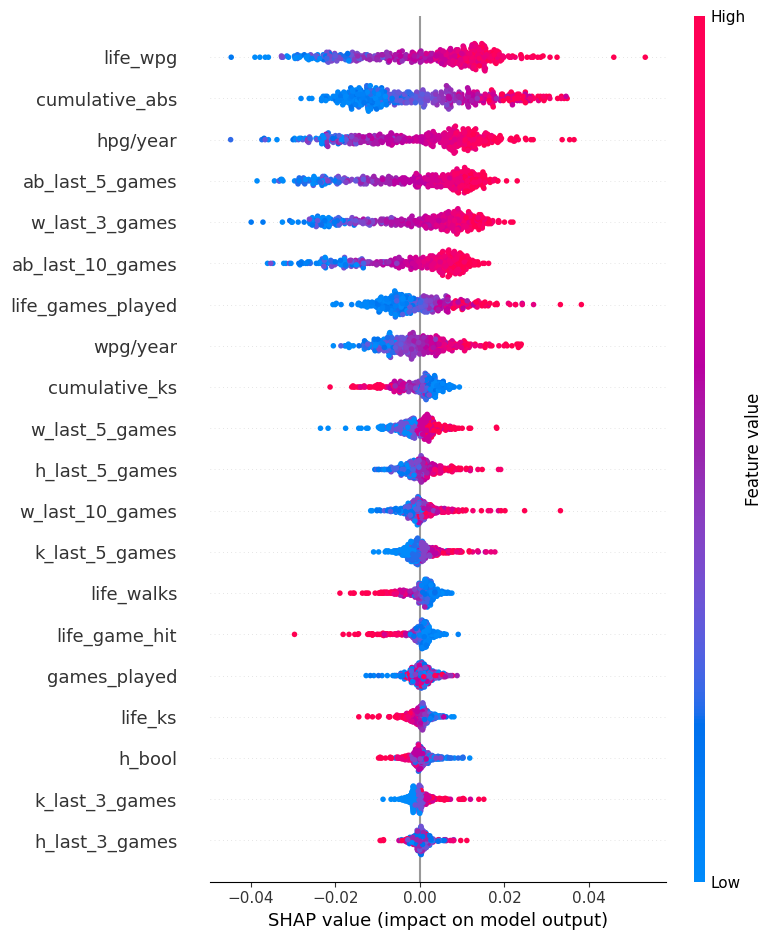

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

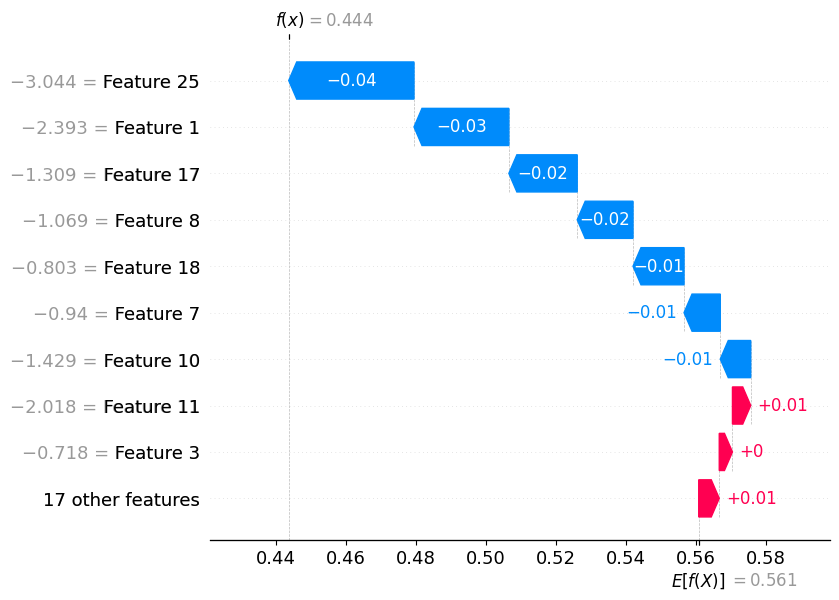

In [ ]:
shap.plots.waterfall(shap_values[10])

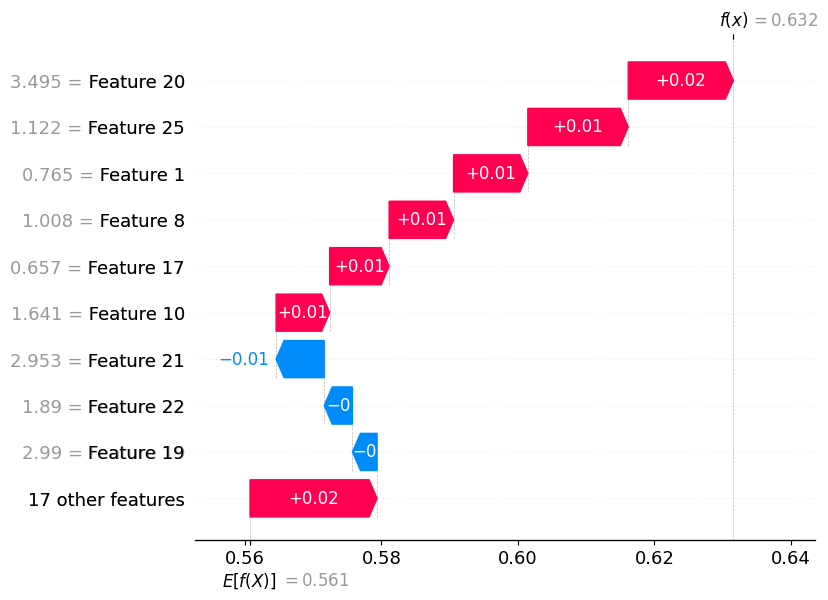

In [ ]:
shap.plots.waterfall(shap_values[68])